In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial
from itertools import permutations
%matplotlib inline

1. Напишите код, моделирующий выпадение поля в рулетке (с учетом поля зеро).

In [2]:
def roulette():
    val = np.random.randint(0, 37)
    if val in [1,3,5,7,9,12,14,16,18,19,21,23,25,27,30,32,34,36]:
        color = 'RED'
    elif val!=0:
        color = 'BLACK'
    else:
        print('ZERO')
        return None
    print(f"{val}, {color}, {'EVEN' if val%2==0 else 'ODD'}")

In [3]:
for _ in range(10):
    roulette()

20, BLACK, EVEN
17, BLACK, ODD
4, BLACK, EVEN
16, RED, EVEN
32, RED, EVEN
13, BLACK, ODD
17, BLACK, ODD
24, BLACK, EVEN
26, BLACK, EVEN
24, BLACK, EVEN


2.1. Напишите код, проверяющий любую из теорем сложения или умножения вероятности на примере рулетки или подбрасывания монетки.

In [4]:
def coin(n_throws):
    print(f'Должно при {n_throws} бросках выпасть {n_throws/2} орлов.')
    throws = np.random.randint(0,2,n_throws)
    print(f'Выпало {throws.sum()} орлов.')

In [5]:
coin(100)

Должно при 100 бросках выпасть 50.0 орлов.
Выпало 48 орлов.


2.2. Сгенерируйте десять выборок случайных чисел х0, …, х9 и постройте гистограмму распределения случайной суммы  +х0 + …+ х 9. 

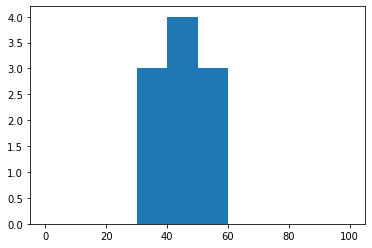

In [6]:
sample = np.random.uniform(0,10,(10,10))
plt.hist(sample.sum(axis=1), bins=10, range=(0,100))
plt.show()

3.1. Дополните код Монте-Карло последовательности независимых испытаний расчетом соответствующих вероятностей (через биномиальное распределение) 
и сравните результаты.

In [7]:
def combi(k, n):
    return factorial(n)/(factorial(k)*factorial(n-k))

def binomial(p, k, n):
    q = 1 - p
    return combi(k, n) * p**k * q**(n-k)

In [8]:
n = 100
k = 50
x = np.random.randint(0, 2, (n, 1000))
res = x.sum(axis=0)
k_rate = sum(res==k)
print(f'Теоретическая вероятность: {binomial(0.5, k, n)}')
print(f'Результат эксперимента: {k_rate/1000}')

Теоретическая вероятность: 0.07958923738717877
Результат эксперимента: 0.077


3.2. Повторите расчеты биномиальных коэффициентов и вероятностей k успехов в последовательности из n независимых испытаний, взяв другие значения n и k.

In [9]:
n = 7
k = 3
x = np.random.randint(0, 2, (n, 1000))
res = x.sum(axis=0)
k_rate = sum(res==k)
print(f'Теоретическая вероятность: {binomial(0.5, k, n)}')
print(f'Результат эксперимента: {k_rate/1000}')

Теоретическая вероятность: 0.2734375
Результат эксперимента: 0.276


4. Из урока по комбинаторике повторите расчеты, сгенерировав возможные варианты перестановок для других значений n и k

In [10]:
n = 4
k = 3
c = 0
for p in permutations(''.join(map(str,range(n))), k):
    print(''.join(p))
    c += 1
print(f'Получилось {c}')
print(f'Должно быть {int(factorial(n)/factorial(n-k))}')

012
013
021
023
031
032
102
103
120
123
130
132
201
203
210
213
230
231
301
302
310
312
320
321
Получилось 24
Должно быть 24


5. Дополните код расчетом коэффициента корреляции x и y по формуле

Коэффициент корреляции: 0.6683


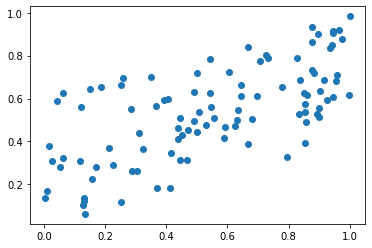

In [11]:
n = 100
r = 0.4
x = np.random.rand(n)
y = r*x + (1 - r) * np.random.rand(n)
corr = ((x - x.mean())*(y-y.mean())).sum() / np.sqrt(((x - x.mean())**2).sum()*((y - y.mean())**2).sum())

plt.scatter(x, y)
print(f'Коэффициент корреляции: {corr:.4f}')